Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

# classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#CNN tools
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential


Data preprocessing

In [2]:
df_init = pd.read_csv('BankChurners.csv')
df_init=df_init.drop(df_init.columns[-1], axis=1)
df_init=df_init.drop(df_init.columns[-1], axis=1)
df_init.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
def Category_dtype_Helper(df : pd.DataFrame):
        cols = df.columns
        result_df = pd.DataFrame(columns=("Column","Type","Unique Count", "Total Count","Is Category Good"))
        
        for col in cols:
            col_type = df[col].dtype
            count_unique = df[col].nunique()
            count_total = len(df[col])
            if col_type == object and count_unique < count_total*0.7: 
                cat_good = True
            else:
                cat_good = False            

            result_df.loc[len(result_df.index)]=[col,col_type,count_unique,count_total,cat_good]
        return result_df

def ChangeTypesToCategory(df : pd.DataFrame):
         helper_df = Category_dtype_Helper(df)
         for col in df.columns:
             if helper_df[helper_df["Column"] == col]["Is Category Good"].iloc[0]:           
                 df[col] = df[col].astype("category")



In [5]:
ChangeTypesToCategory(df_init)
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [6]:
df_init = df_init.rename(columns = {'CLIENTNUM':'Customer_ID'})

In [7]:
tab_info=pd.DataFrame(df_init.dtypes).T.rename(index={0:'column type'})
tab_info=pd.concat([tab_info, pd.DataFrame(df_init.isnull().sum()).T.rename(index={0:'null values (nb)'})])
tab_info=pd.concat([tab_info, pd.DataFrame(df_init.isnull().sum()/df_init.shape[0]*100).T.
                         rename(index={0:'null values (%)'})])
display(tab_info)

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
column type,int64,category,int64,category,int64,category,category,category,category,int64,...,int64,int64,float64,int64,float64,float64,int64,int64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print('Dataframe dimensions:', df_init.shape)

Dataframe dimensions: (10127, 21)


In [9]:
print('Duplicates count: {}'.format(df_init.duplicated().sum()))

Duplicates count: 0


In [10]:
df_init['Attrition_Flag'].unique()

['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']

In [11]:
df_init['Existing_Customer'] = (df_init['Attrition_Flag'] == 'Existing Customer').astype("int")
df_init = df_init.drop(['Attrition_Flag'], axis=1)

In [12]:
df_init.head()

,Customer_ID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing_Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [13]:
df = df_init

Define plot funtions

In [14]:
plt.rc('font', weight='bold')

def plot_dwo_pies(first_data, second_data, labels, colors, plotText, subText1, subText2):
    
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(1,2,1)
    sizes  = first_data
    explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
    ax.pie(sizes, explode = explode, labels=labels, colors = colors,
        autopct = lambda x:'{:1.1f}%'.format(x) if x > 1 else '',
        shadow = False, startangle=0)
    ax.axis('equal')
    ax.text(0.0, 1.1, subText1, ha='center', fontsize = 18)

    ax = fig.add_subplot(1,2,2)
    sizes  = second_data
    explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
    ax.pie(sizes, explode = explode, labels=labels, colors = colors,
        autopct = lambda x:'{:1.1f}%'.format(x) if x > 1 else '',
        shadow = False, startangle=0)
    ax.axis('equal')
    ax.text(0.0, 1.1, subText2, ha='center', fontsize = 18)
    
    fig.text(0.5, 1.01, plotText, ha='center', fontsize = 18)



    

In [15]:
def plot_dwo_bars(first_data, second_data, labels, colors, plotText, subText1, subText2):
    
    first_data = first_data /sum(first_data)
    second_data = second_data /sum(second_data)

    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(1,1,1)

    ind = np.arange(len(labels))
    width = 0.35 

    rects1 = ax.bar(ind, first_data, width, color=colors[0])

    rects2 = ax.bar(ind+width, second_data, width, color=colors[1])

    ax.set_ylabel('Percent')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( labels)
    ax.legend( (rects1[0], rects2[0]), (subText1, subText2) )
    fig.text(0.5, 1.01, plotText, ha='center', fontsize = 18)

Visualization of some difference in existing and former customers

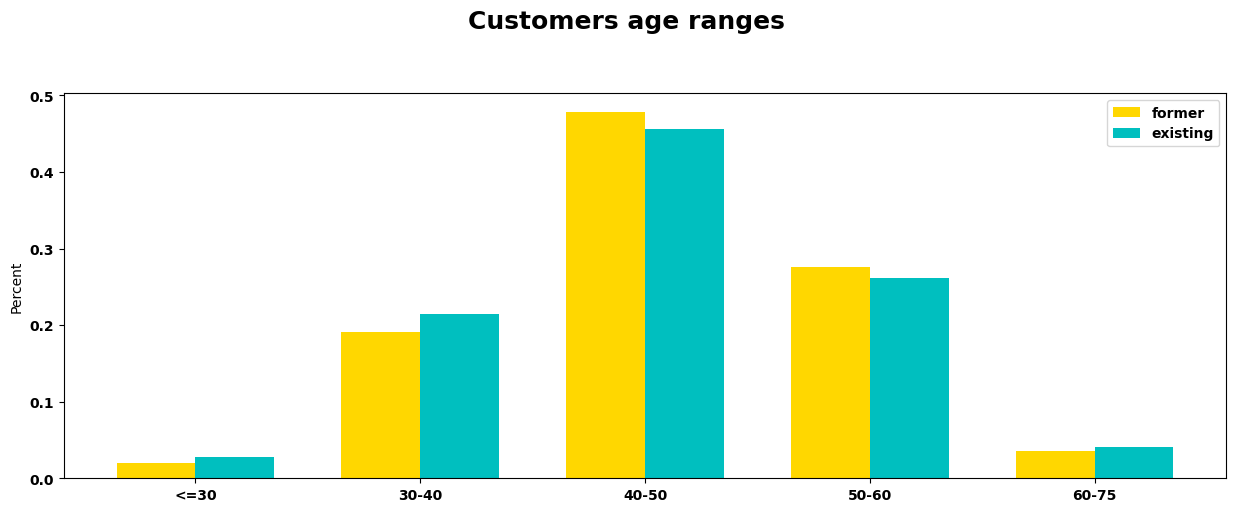

In [16]:
age_range = [0, 30, 40, 50, 60, 75]
count_customers_attrited  = []
count_customers_existing  = []
for i, age in enumerate(age_range):
    if i == 0: 
       continue

    val = df[(df['Customer_Age'] <= age) &
                       (df['Customer_Age'] > age_range[i-1])
                       &  (df['Existing_Customer']==True )]['Customer_Age'].count()
    count_customers_existing.append(val)

    val = df[(df['Customer_Age'] <= age) &
                       (df['Customer_Age'] > age_range[i-1])
                       &  (df['Existing_Customer']==False )]['Customer_Age'].count()
    count_customers_attrited.append(val)



colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = ['<=30']+[ '{}-{}'.format(age_range[i-1], s) for i,s in enumerate(age_range) if i>1 and i<6]

plot_dwo_bars(count_customers_attrited, count_customers_existing, labels, colors[:2], "Customers age ranges", "former", "existing")

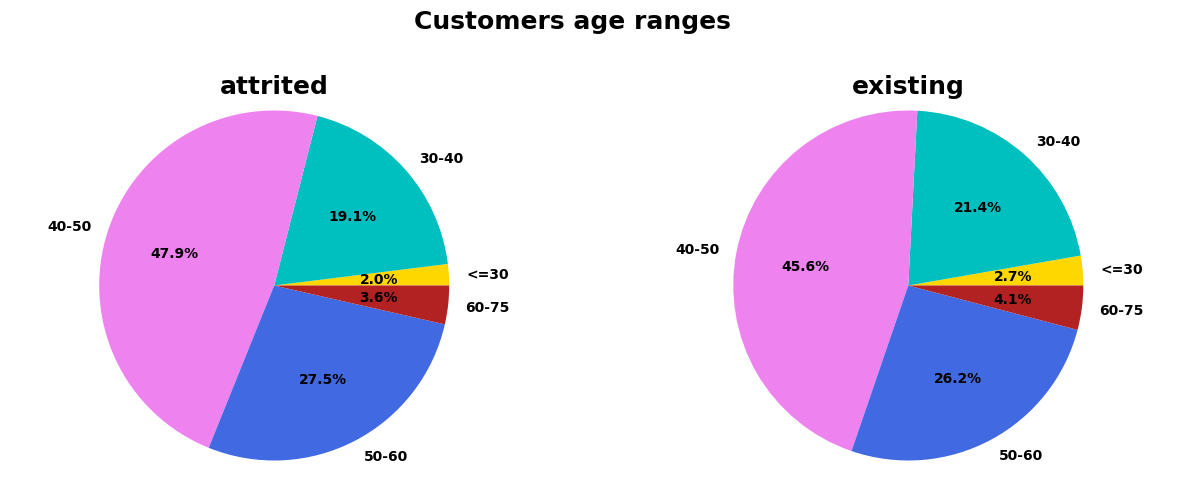

In [17]:
age_range = [0, 30, 40, 50, 60, 75]
count_customers_former  = []
count_customers_existing  = []
for i, age in enumerate(age_range):
    if i == 0: 
       continue

    val = df[(df['Customer_Age'] <= age) &
                       (df['Customer_Age'] > age_range[i-1])
                       &  (df['Existing_Customer']==True )]['Customer_Age'].count()
    count_customers_existing.append(val)

    val = df[(df['Customer_Age'] <= age) &
                       (df['Customer_Age'] > age_range[i-1])
                       &  (df['Existing_Customer']==False )]['Customer_Age'].count()
    count_customers_former.append(val)


colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = ['<=30']+[ '{}-{}'.format(age_range[i-1], s) for i,s in enumerate(age_range) if i>1 and i<6]

plot_dwo_pies(count_customers_former, count_customers_existing, labels, colors, "Customers age ranges", "attrited", "existing")

In [18]:
df['Education_Level'].unique()

['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']

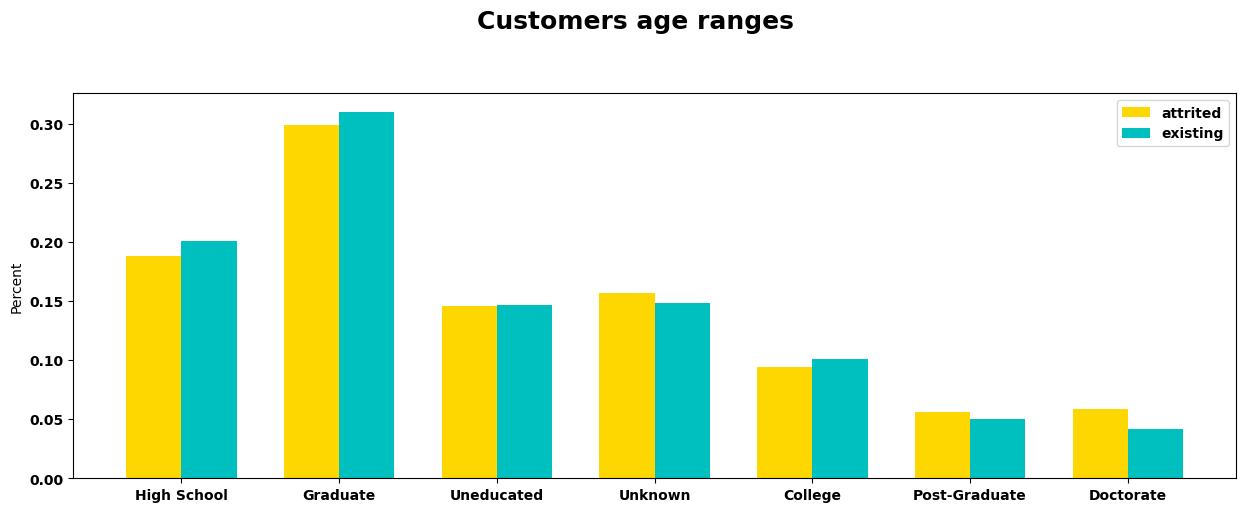

In [19]:
Education_Levels = df['Education_Level'].unique()
count_customers_attrited  = []
count_customers_existing  = []
for i, age in enumerate(Education_Levels):

    val = df[(df['Education_Level'] == Education_Levels[i]) 
                       &  (df['Existing_Customer']==True )]['Education_Level'].count()
    count_customers_existing.append(val)

    val = df[(df['Education_Level'] == Education_Levels[i]) 
                       &  (df['Existing_Customer']==False )]['Education_Level'].count()
    count_customers_attrited.append(val)

colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = Education_Levels

plot_dwo_bars(count_customers_attrited, count_customers_existing, labels, colors[:2], "Customers age ranges", "attrited", "existing")

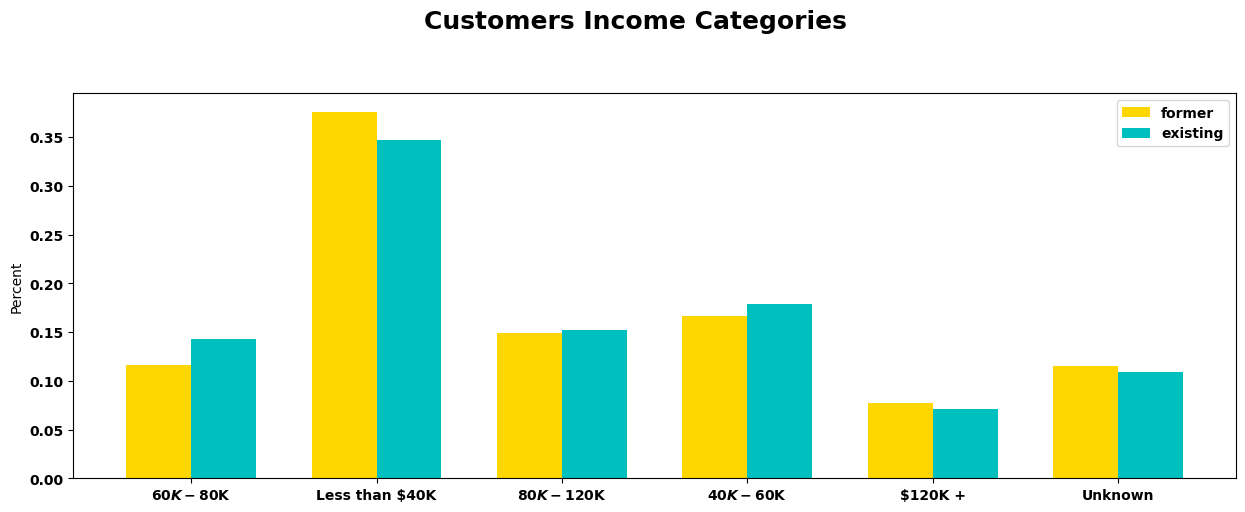

In [20]:
Income_Categories = df['Income_Category'].unique()
count_customers_former  = []
count_customers_existing  = []
for i, age in enumerate(Income_Categories):

    val = df[(df['Income_Category'] == Income_Categories[i]) 
                       &  (df['Existing_Customer']==True )]['Income_Category'].count()
    count_customers_existing.append(val)

    val = df[(df['Income_Category'] == Income_Categories[i]) 
                       &  (df['Existing_Customer']==False )]['Income_Category'].count()
    count_customers_former.append(val)

colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = Income_Categories

plot_dwo_bars(count_customers_former, count_customers_existing, labels, colors[:2], "Customers Income Categories", "former", "existing")

In [21]:
df['Card_Category'].unique()

['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

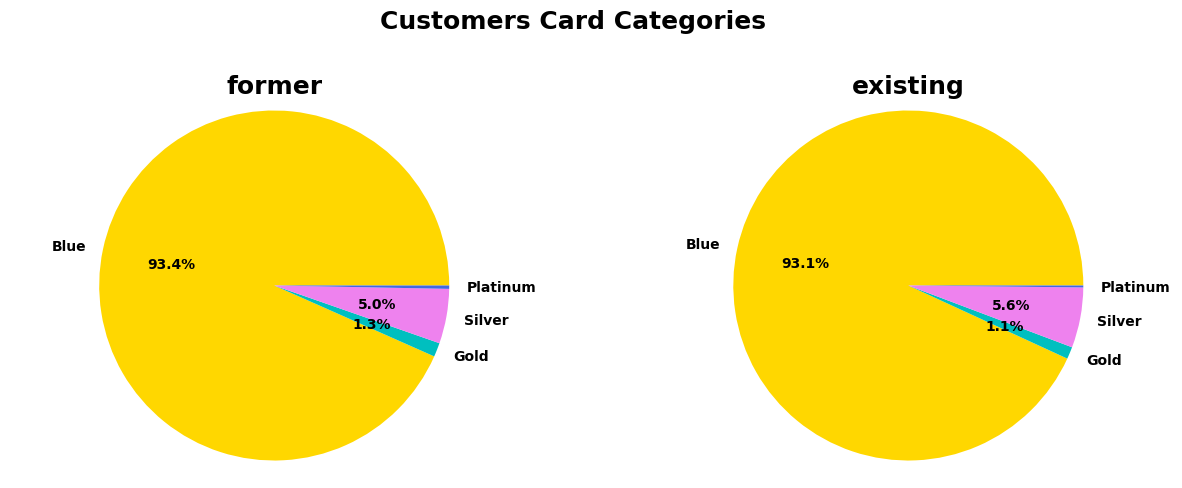

In [22]:
Card_Categories = df['Card_Category'].unique()
count_customers_former  = []
count_customers_existing  = []
for i, age in enumerate(Card_Categories):

    val = df[(df['Card_Category'] == Card_Categories[i]) 
                       &  (df['Existing_Customer']==True )]['Card_Category'].count()
    count_customers_existing.append(val)

    val = df[(df['Card_Category'] == Card_Categories[i]) 
                       &  (df['Existing_Customer']==False )]['Card_Category'].count()
    count_customers_former.append(val)


colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = Card_Categories

plot_dwo_pies(count_customers_former, count_customers_existing, labels, colors, "Customers Card Categories", "former", "existing")

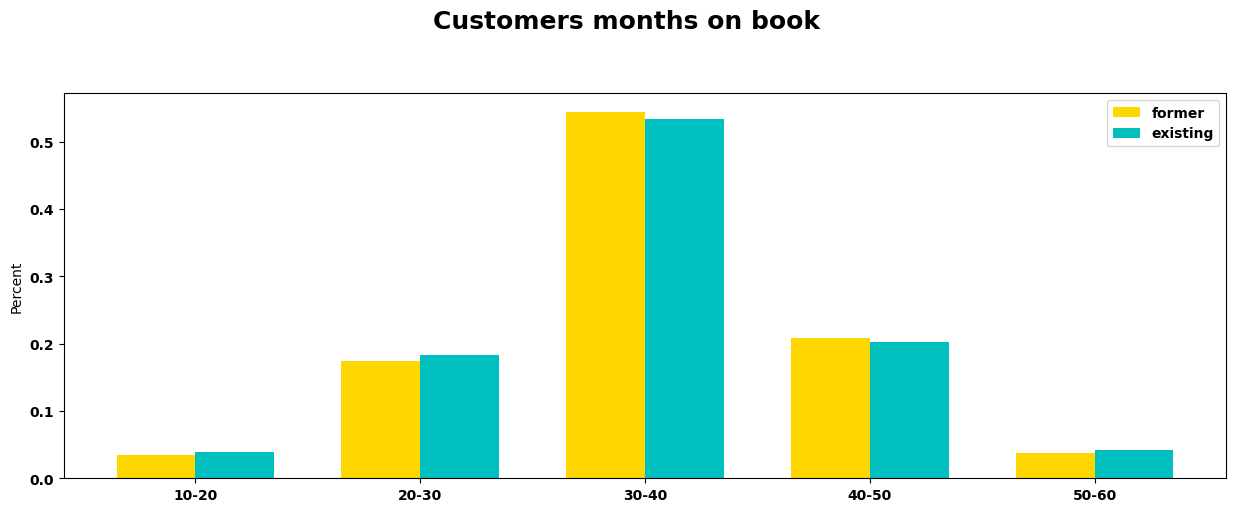

In [23]:
Months_on_book_range = [10, 20, 30, 40, 50, 60]
count_customers_former  = []
count_customers_existing  = []
for i, months in enumerate(Months_on_book_range):
    if i == 0: 
       continue

    val = df[(df['Months_on_book'] <= months) &
                       (df['Months_on_book'] > Months_on_book_range[i-1])
                       &  (df['Existing_Customer']==True )]['Months_on_book'].count()
    count_customers_existing.append(val)

    val = df[(df['Months_on_book'] <= months) &
                       (df['Months_on_book'] > Months_on_book_range[i-1])
                       &  (df['Existing_Customer']==False )]['Months_on_book'].count()
    count_customers_former.append(val)



colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}-{}'.format(Months_on_book_range[i-1], s) for i,s in enumerate(Months_on_book_range) if i>0]

plot_dwo_bars(count_customers_former, count_customers_existing, labels, colors[:2], "Customers months on book", "former", "existing")

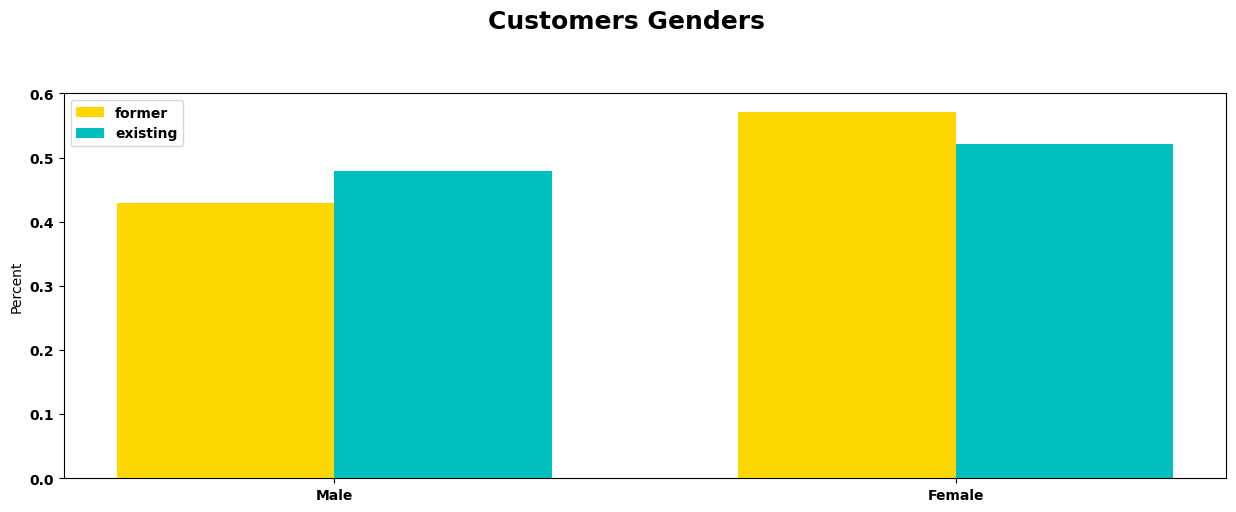

In [24]:
Genders = df['Gender'].unique()
count_customers_former  = []
count_customers_existing  = []
for i, ___ in enumerate(Genders):

    val = df[(df['Gender'] == Genders[i]) 
                       &  (df['Existing_Customer']==True )]['Gender'].count()
    count_customers_existing.append(val)

    val = df[(df['Gender'] == Genders[i]) 
                       &  (df['Existing_Customer']==False )]['Gender'].count()
    count_customers_former.append(val)


colors = ['gold', 'c', 'violet', 'royalblue','firebrick']
labels = [{'M':'Male','F':'Female'}[g] for g in Genders]

plot_dwo_bars(count_customers_former, count_customers_existing, labels, colors[:2], "Customers Genders", "former", "existing")

Searching for correlation

In [25]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [26]:
correlations = df.corr(numeric_only=True)['Existing_Customer']
correlations = correlations.drop(['Existing_Customer', 'Customer_ID', ],axis=0).rename('correlation with Existing_Customer')
abs_correlations = abs(correlations.rename('abs correlation with Existing_Customer'))
all_correlations = pd.concat([correlations,abs_correlations],axis=1)
all_correlations.sort_values(by='abs correlation with Existing_Customer', ascending=False)

,correlation with Existing_Customer,abs correlation with Existing_Customer
Total_Trans_Ct,0.371403,0.371403
Total_Ct_Chng_Q4_Q1,0.290054,0.290054
Total_Revolving_Bal,0.263053,0.263053
Contacts_Count_12_mon,-0.204491,0.204491
Avg_Utilization_Ratio,0.178410,0.178410
Total_Trans_Amt,0.168598,0.168598
Months_Inactive_12_mon,-0.152449,0.152449
Total_Relationship_Count,0.150005,0.150005
Total_Amt_Chng_Q4_Q1,0.131063,0.131063
Credit_Limit,0.023873,0.023873


Using One Hot Encoding to prepare data for classification models

In [27]:
Gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
Marital_Status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')
Education_Level_dummies = pd.get_dummies(df['Education_Level'], prefix='Education_Level')
Income_Category_dummies = pd.get_dummies(df['Income_Category'], prefix='Income_Category')
Card_Category_dummies = pd.get_dummies(df['Card_Category'], prefix='Card_Category')

df_encoded = df.drop(['Customer_ID','Gender', 'Marital_Status', 'Education_Level','Income_Category','Card_Category','Existing_Customer'],axis=1)
df_encoded = df_encoded.join([Gender_dummies, Marital_Status_dummies, Education_Level_dummies, Income_Category_dummies, Card_Category_dummies])
df_encoded.head()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


Trying k-means algorithm for clustering

In [28]:
matrix = df_encoded.values
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=50)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7087515063279819
For n_clusters = 3 The average silhouette_score is : 0.6002881635125117
For n_clusters = 4 The average silhouette_score is : 0.529207726824191
For n_clusters = 5 The average silhouette_score is : 0.5604653216947388
For n_clusters = 6 The average silhouette_score is : 0.5038085822454291
For n_clusters = 7 The average silhouette_score is : 0.5002963022744721
For n_clusters = 8 The average silhouette_score is : 0.4509376762651128
For n_clusters = 9 The average silhouette_score is : 0.45213504098050217


In [29]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters = kmeans.predict(matrix)

In [30]:
pd.Series(clusters).value_counts()

1    6997
2    2058
0    1072
dtype: int64

Trying AgglomerativeClustering algorithm for clustering 

In [31]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=n_clusters)
model = model.fit(matrix)

In [32]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            #print(grid)
            if grid[1] < 1.0:
                grid_label = [""]+["{:.1f}".format(x) for x in grid[1:]]
            else:
                grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            #print(grid_label)
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

In [34]:
list_cols = ['Total_Trans_Ct','Total_Trans_Amt','Credit_Limit','Months_Inactive_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio']
selected_customers = df.copy(deep = True)
matrix = selected_customers[list_cols].values

In [35]:
scaler = StandardScaler()
scaler.fit(matrix)
scaled_matrix = scaler.transform(matrix)

In [36]:
selected_customers.loc[:, 'cluster'] = model.labels_

In [37]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean(numeric_only=True))
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.drop('Customer_ID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('size')

number of customers: 10127


Show mean values in each cluster, including percent of existing customers

In [38]:
merged_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing_Customer,size
cluster,,,,,,,,,,,,,,,,
2.0,46.408451,2.600939,36.046948,3.490610,2.302817,2.497653,32572.443662,1178.933099,31393.510563,0.764573,5609.974178,69.284038,0.704415,0.036197,0.834507,852
1.0,46.246564,2.441581,35.963058,3.739691,2.340206,2.494845,18660.782646,1118.786942,17541.995704,0.762478,5389.535223,68.945876,0.717796,0.060256,0.867698,1164
0.0,46.328689,2.305758,35.910985,3.856861,2.345333,2.445198,4677.958587,1167.439157,3510.519430,0.759090,4135.996178,63.807299,0.712243,0.330769,0.835779,8111


Using RadarCharts to show more insights of clusters

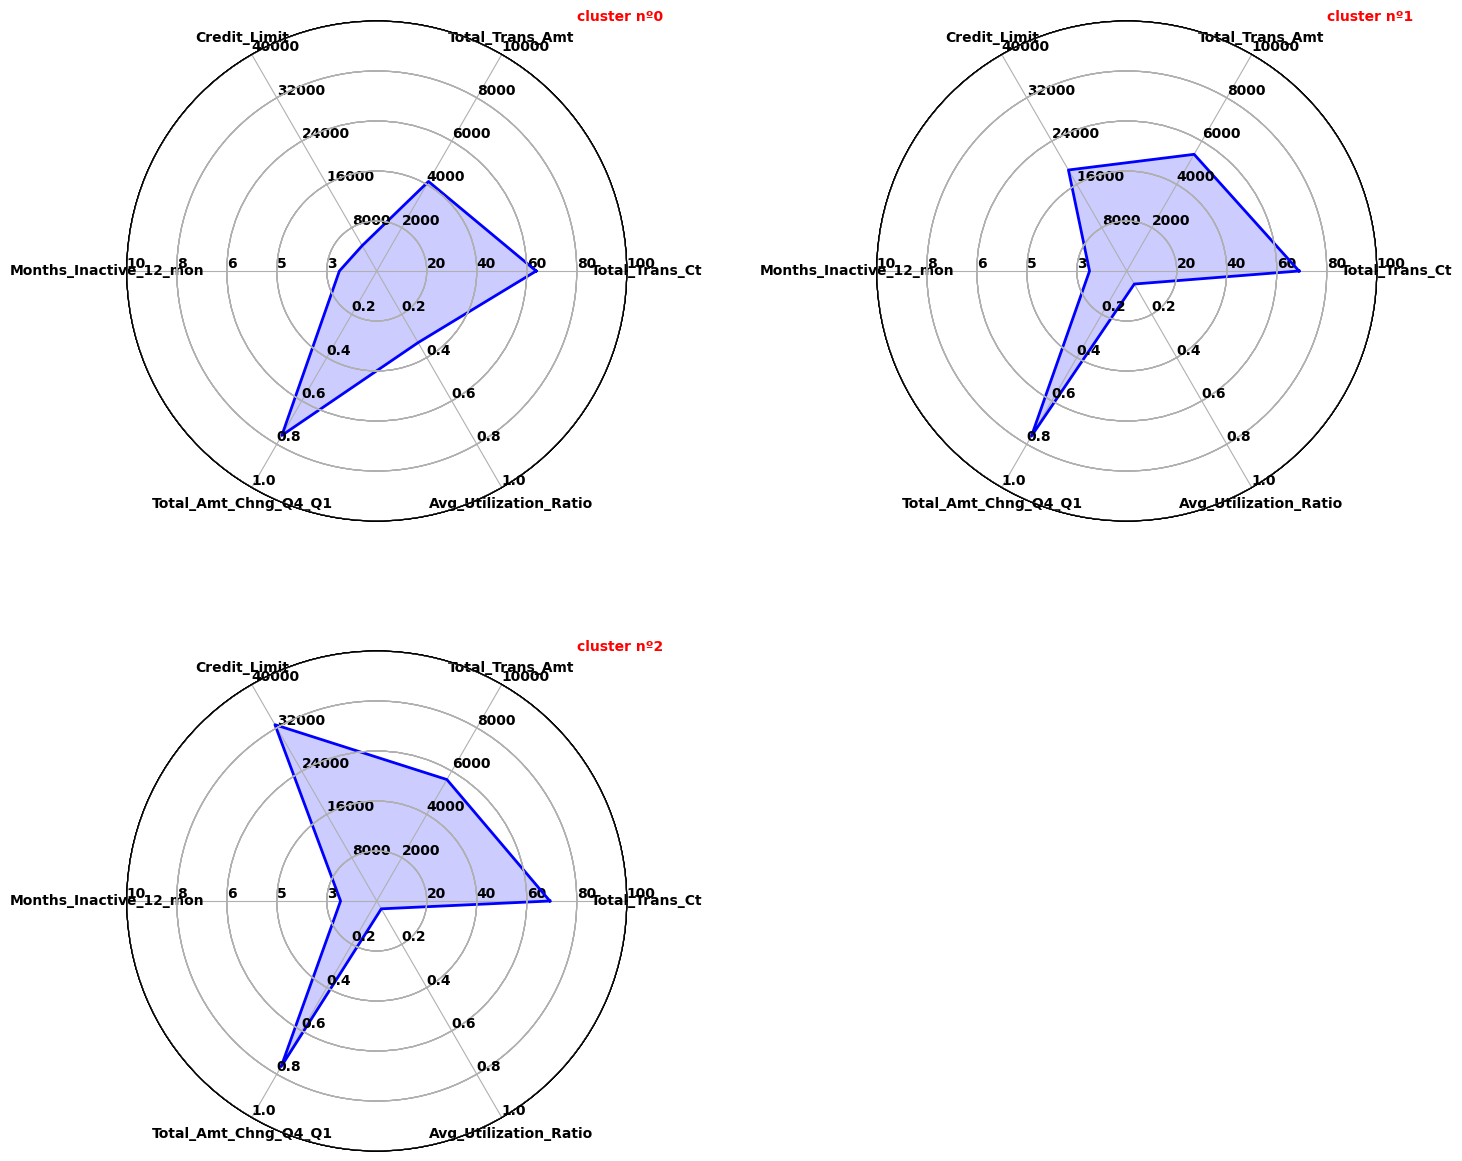

In [39]:
fig = plt.figure(figsize=(10,6))

attributes = ['Total_Trans_Ct','Total_Trans_Amt','Credit_Limit','Months_Inactive_12_mon','Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio']
ranges = [[0.1, 100],[0, 10000],[0, 40000],[1, 10],[0.0, 1.0],[0.0, 1.0]]#[[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [i for i in range(n_clusters)] 
n_groups = n_clusters ; i_cols = 2
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%2 ; iy = i_rows - ind//2
    pos_x = ix*(size_x + 0.25) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges,n_ordinate_levels = 6)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

Building classification models to predict the status of customer

In [40]:
def train_model(model, X_train, y_train, X_test,y_test, model_name):

    model.fit(X_train, y_train)  

    y_pred = model.predict(X_test)

    accuracy            = accuracy_score(y_test, y_pred)
    f1                  = f1_score(y_test, y_pred)
    precision           = precision_score(y_test, y_pred)
    recall              = recall_score(y_test, y_pred)

    result_df = pd.DataFrame([[accuracy, f1, precision, recall]], columns=['accuracy', 'f1_score', 'precision', 'recall'])
    result_df.index = [model_name]
    return result_df

In [41]:
Gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
Marital_Status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')
Education_Level_dummies = pd.get_dummies(df['Education_Level'], prefix='Education_Level')
Income_Category_dummies = pd.get_dummies(df['Income_Category'], prefix='Income_Category')
Card_Category_dummies = pd.get_dummies(df['Card_Category'], prefix='Card_Category')

df_encoded = df.drop(['Customer_ID','Gender', 'Marital_Status', 'Education_Level','Income_Category','Card_Category'],axis=1)
df_encoded = df_encoded.join([Gender_dummies, Marital_Status_dummies, Education_Level_dummies, Income_Category_dummies, Card_Category_dummies])
df_encoded.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [42]:
X_cols = df_encoded.columns.to_list()
X_cols.remove('Existing_Customer')
X = df_encoded[X_cols]
y = df_encoded['Existing_Customer']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=10)

In [44]:
scaler = StandardScaler()
scaler.fit(X_train,)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [45]:
tree = DecisionTreeClassifier(criterion="entropy")
results = train_model(tree, X_train, y_train, X_test, y_test, 'Decision_Tree')

In [46]:
forest_100 = RandomForestClassifier(n_estimators=100,criterion="gini")
results = pd.concat([results, train_model(forest_100, X_train, y_train, X_test, y_test, 'Random_Forest')])

In [47]:
KNN_3 = KNeighborsClassifier(n_neighbors=3)
results = pd.concat([results, train_model(KNN_3, X_train, y_train, X_test, y_test, 'KNN_3')])

In [48]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
results = pd.concat([results, train_model(KNN_5, X_train, y_train, X_test, y_test, 'KNN_5')])

In [49]:
simple_ann = Sequential()
simple_ann.add(Dense(units=5,activation='relu',))
simple_ann.add(Dense(units=1,activation='sigmoid'))
simple_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
222/222 [==============================] - 1s 1ms/step - loss: 0.6657 - accuracy: 0.6469
Epoch 2/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8462
Epoch 3/100
222/222 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8737
Epoch 4/100
222/222 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8888
Epoch 5/100
222/222 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8949
Epoch 6/100
222/222 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.8986
Epoch 7/100
222/222 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.9011
Epoch 8/100
222/222 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.9025
Epoch 9/100
222/222 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9025
Epoch 10/100
222/222 [==============================] - 0s 1ms/step - loss: 0.2356 - accura

In [50]:
probability_pred = simple_ann.predict(X_test)
y_pred = (probability_pred > 0.5)
accuracy =          accuracy_score(y_test, y_pred)
f1 =                f1_score(y_test, y_pred)
precision =         precision_score(y_test, y_pred)
recall =            recall_score(y_test, y_pred)
simple_ann_result = pd.DataFrame([[accuracy, f1, precision, recall]], columns=['accuracy', 'f1_score', 'precision', 'recall'])
simple_ann_result.index = ['Simple_Neural_Network']
results = pd.concat([results, simple_ann_result])

95/95 [==============================] - 0s 1ms/step


Showing the summary of classificaton models

In [51]:
results.style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

,accuracy,f1_score,precision,recall
Decision_Tree,0.939783,0.964459,0.964646,0.964272
Random_Forest,0.957881,0.975498,0.961872,0.989515
KNN_3,0.866074,0.924560,0.884397,0.968544
KNN_5,0.867391,0.925933,0.878925,0.978252
Simple_Neural_Network,0.927937,0.957681,0.953077,0.962330
